In [18]:
import dask.array as da
from dask_ml import cluster
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc_context

In [10]:
data = pd.read_csv('./analysis_results/fov_counts.csv')

In [14]:
data.shape

(1245625, 27)

In [12]:
X = data.drop(columns=['fov', 'center_x', 'center_y','names'])
x = da.from_array(X.values, chunks=(1000, X.shape[1]))

In [21]:
spectral = cluster.SpectralClustering(n_clusters=30, n_components=5, random_state=0)
spectral.fit(x)
labels = spectral.labels_

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Found fewer than 30 clusters in init (found 23).


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.I

In [39]:
data['cluster_no'] = labels.astype('str')

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [40]:
fov = 'mPFC_NF3_r1-mPFC'
single_fov = data[data['fov'] == fov]

/var/folders/w6/hlw3gptn62s2rz_xj4tjg3tc0000gn/T/ipykernel_57606/155650282.py:3: UserWarning: The palette list has more values (30) than needed (24), which may not be intended.
  sns.scatterplot(x='center_x', y='center_y', data=single_fov, hue='cluster_no', ax=ax, palette=palette)


<Axes: xlabel='center_x', ylabel='center_y'>

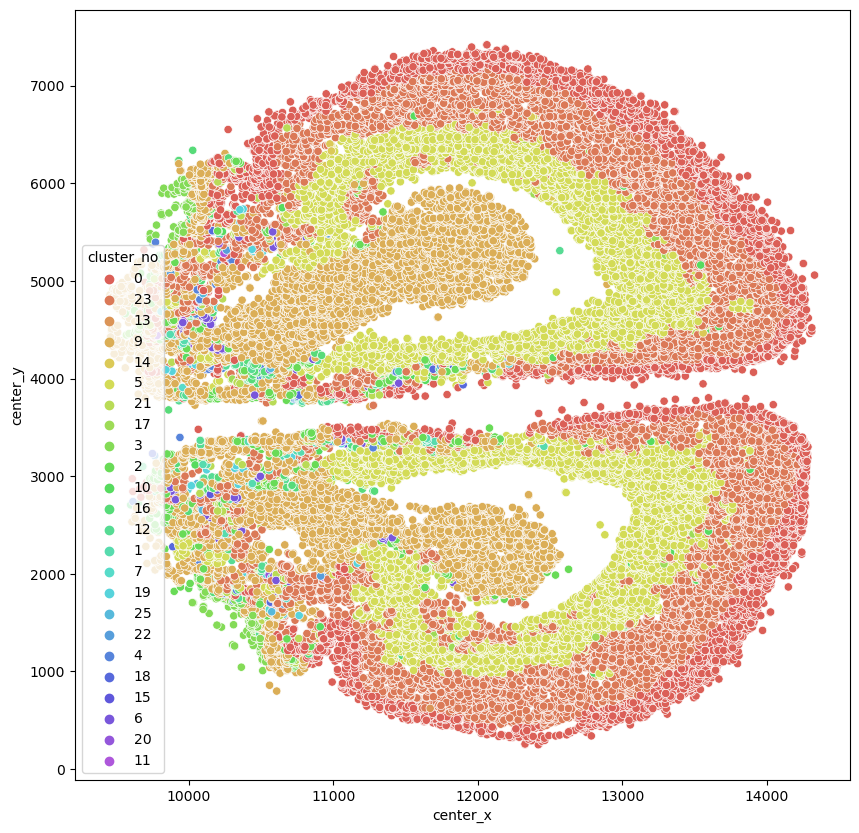

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
palette = sns.color_palette("hls", 30)
sns.scatterplot(x='center_x', y='center_y', data=single_fov, hue='cluster_no', ax=ax, palette=palette)

In [42]:
temp = data.drop(columns=['fov', 'center_x', 'center_y','names'])
cluster_centers = temp.groupby('cluster_no').mean()

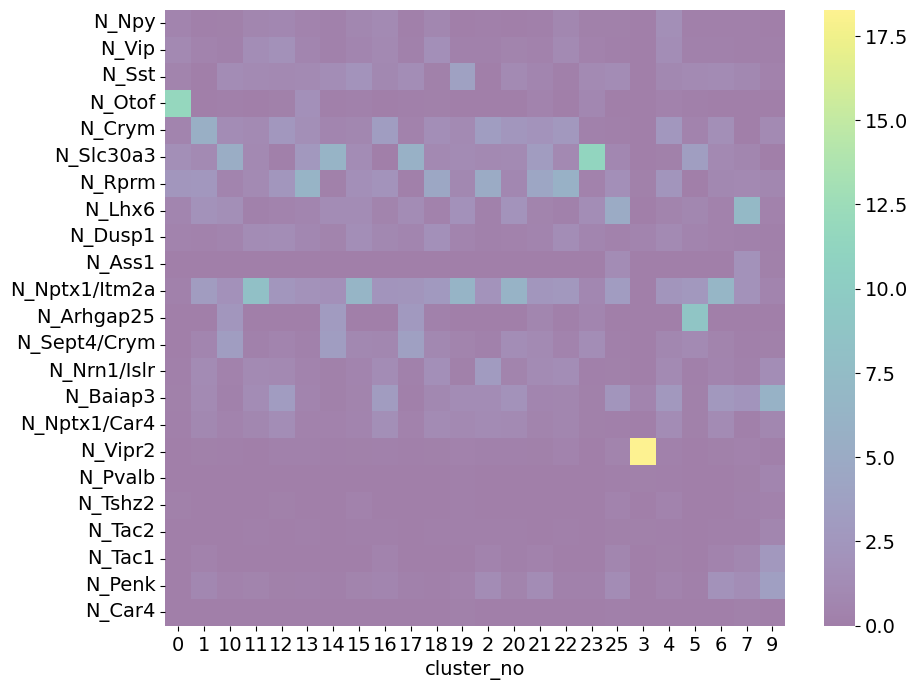

In [47]:
with rc_context({'figure.figsize': (10, 8), 'font.size': 14}):
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    sns.heatmap(cluster_centers.T, ax=ax, cmap='viridis', alpha=0.5)

In [48]:
data.to_csv('./analysis_results/fov_counts_clusters.csv', index=False)